In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
def use_svg_display():
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
set_figsize()

In [2]:
economy = pd.ExcelFile('./data/1.经济发展度2018-2022.xlsx')
economy_2018 = economy.parse('2018').iloc[:26, :6]
economy_2019 = economy.parse('2019').iloc[:26, :6]
economy_2020 = economy.parse('2020').iloc[:26, :6]
economy_2021 = economy.parse('2021').iloc[:26, :6]
economy_2022 = economy.parse('2022').iloc[:26, :6]
economy_2022

NameError: name 'pd' is not defined

In [ ]:
economy = pd.concat([economy_2018, economy_2019, economy_2020, economy_2021, economy_2022], axis=0)
economy

,城市,城市GDP （亿元）,第三产业增加值（亿元）,社会消费品零售总额（亿元）,人均GDP(元),年末户籍人口（万人）
0,重庆,21588.80000,11367.90000,10705.2000,63428.564713,3403.6400
1,成都,15342.77000,8303.99000,6801.8000,103944.785068,1476.0500
2,上海,36011.80000,25546.30000,14874.8000,246254.735431,1462.3800
3,北京,33106.00000,27508.10000,14422.3000,240630.905655,1375.8000
4,天津,13362.90000,8352.30000,4231.2000,123544.095486,1081.6300
...,...,...,...,...,...,...
21,宁波,15041.97159,7408.14657,4639.8018,242182.765899,621.1000
22,大连,8064.71139,4103.23254,1905.8806,134462.279855,599.7750
23,昆明,7428.92931,4707.50841,3379.6272,127995.060539,580.4075
24,深圳,31540.69902,19743.56241,9479.1038,578227.115391,545.4725


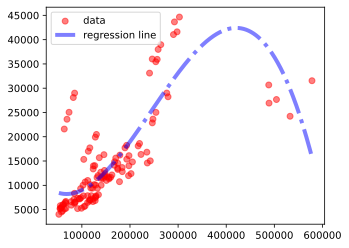

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
set_figsize((5, 4))
# 取出自变量（X）和因变量（y）
X = economy.iloc[:, 4].values.reshape(-1,1)
y = economy.iloc[:, 1].values.reshape(-1,1)

# 创建一个 PolynomialFeatures 对象，设置 degree=2 来获得二次多项式特征
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# 建立一元线性回归模型
reg = LinearRegression().fit(X_poly, y)

# 画出数据点
plt.scatter(X, y, color='r', alpha=0.5, label='data')

# 画出回归线
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.plot(X_grid, reg.predict(poly.fit_transform(X_grid)), linestyle='-.', color='b', alpha=0.5, linewidth=4, label='regression line')
plt.legend()
plt.show()

In [ ]:
# 输出模型的系数和截距
print('Coefficients(按阶递增排列): \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients(按阶递增排列): 
 [[ 0.00000000e+00 -1.34656851e-01  1.14666729e-06 -1.56374913e-12]]
Intercept: 
 [12554.63130242]
